# Mini Project #1 Julien Fresnel

## Problem 1

###### a) 

$A \in \mathbb{C}^{m \times n}$ , $y \in \mathbb{C}^{m}$. The above equation ,is called normal equation, and this kind of equation always have a solution. Because $A^{H}A$ is a $n \times n$ matrix with a rank of $n$, hence it is invertible.

Let's proove that when $A^{H}A x^* = A^H b$, $x^*$ is a solution of the Least square problem. 

Let $x = x^* + z$

Consider $||Ax-b||^2$

So $Ax-b = A(x^* +z) - b = Az+(Ax^* - b) = Az+\omega$ such that $w= Ax^* - b$

But 

$\begin{align}
||Ax-b||^2 &= ||Az - \omega||^2 \\
           &= <Az+\omega, Az+\omega> \\
            &= <Az,Az> + 2 <Az,\omega> + <\omega, \omega>
\end{align}$



Just as $<Az,\omega> = (Az)^H \omega = z^H A^H \omega = z^H (A^H A x^* - A^H b) = 0$

so $||Ax-b||^2 = ||Az||^2 + ||Ax^* - b||^2$


and then $ ||Ax-b||^2 ≥ ||A x^* - b||^2$
                
that justify that $x^*$ is solution of least square problem

###### b)

The equation above can have two cases of solutions 

- if $N(A) = \{0\}$, then there is only one solution which is $x^* = (A^HA)^{-1} A^Hb$ because $A^HA$ is invertible if and only if $N(A) = \{0\}$

- if $N(A) ≠ \{0\}$ , the equation have an infinity of solutions from a solution $x_{0}^*$ other solution are written such that $x^* = x_{0}^* + z, z \in N(A)*$

###### c)

To solve the above equations if $rank(A)<n$, we can use the alternative methods. 

- the function is the $QR$ decomposition, we determine a factorization such that $A=QR$, where $Q$ is orthogonal, i.e, $Q^TQ = 1$ and $R$ is upper triangular

- the second one is the singular-value decomposition ($SVD$) of $A$, we determine $A=U \Sigma V^T$, in which $U \in \mathbb{R}^{m \times m}$, and $V \in \mathbb{R}^{n \times n}$ are orthogonal, i.e, $U^TU = I \in \mathbb{R}^{m \times m}$ and $V^TV = I \in \mathbb{R}^{n \times n}$ and $\Sigma$ is diagonal

## Problem 2 : Least Squares Classifier

### One vs All classifier training part

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

First we need to load data

In [2]:
mnist = loadmat("/Users/julienfresnel/Documents/Scolaire/UCSD/ECE174/Homework/mnist.mat")
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017',
 '__version__': '1.0',
 '__globals__': [],
 'testX': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8),
 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8),
 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
data_raw_trainX = mnist['trainX']
data_raw_trainX

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
N,p = data_raw_trainX.shape
print(N,p)

60000 784


In [5]:
trainX = pd.DataFrame(data_raw_trainX)
trainX_normalized = trainX.astype(float)
trainX_normalized = trainX_normalized.apply(lambda x: x/255)

In [6]:
one_vector = np.ones(N)

In [7]:
trainX_normalized[784]=one_vector
X_train = trainX_normalized.copy()
X_train = X_train.to_numpy()
X_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [8]:
data_raw_trainY = mnist['trainY']
data_raw_trainY

array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8)

In [9]:
data_raw_trainY.shape

(1, 60000)

In [10]:
data_raw_trainY = data_raw_trainY.reshape((60000,1))
data_raw_trainY

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

In [11]:
trainY = pd.DataFrame(data_raw_trainY)
trainY = trainY.astype(float)
trainY

,0
0,5.0
1,0.0
2,4.0
3,1.0
4,9.0
...,...
59995,8.0
59996,3.0
59997,5.0
59998,6.0


In [12]:
G = list() 
Y_list = list()
T = list()

U,S,Vh = np.linalg.svd(X_train, full_matrices = False)
m,p = U.shape
r = np.linalg.matrix_rank(X_train)
S_ = np.eye(p,p)
for i in range(p):
    S_[i,i] = S[i]
V = np.transpose(Vh)
UH = np.transpose(U)
S_inv = np.linalg.inv(S_)

for i in range(0,10):
    print(i)
    y_train = trainY[0].apply(lambda x: 1.0 if x == i else -1.0)
    y = y_train.to_numpy()
    Y_list.append(y)
    X_pinv = np.dot(np.dot(V,S_inv),UH)
    theta = X_pinv@y
    T.append(theta)
    weight = X_train@theta
    weight= weight.reshape((60000,1))
    #print(weight)
    G.append(weight)

y_pred = np.argmax(G,axis=0)
y_pred_data = pd.DataFrame(y_pred)
y_pred_data

0
1
2
3
4
5
6
7
8
9


,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In this miniproject we use SVD decomposition to get the pseudo inverse of the X matrix, because X isn't a full rank matrix. Such that : 
$X=U \Sigma V^T$ where U and V are orthogonal and $\Sigma$ is a diagonal matrix. 
And the correct pseudo inverse with SVD is $\tilde{X} = V \Sigma^{-1} U^T$

In [13]:
error_rate_train = trainY.copy()
error_rate_train[1] = y_pred_data
error_rate_train.loc[error_rate_train[0] != error_rate_train[1], 'error'] = 1
error_total_train = error_rate_train['error'].sum()
error_total_train = error_total_train/len(error_rate_train)
error_total_train = error_total_train*100
error_total_train

14.196666666666665

In [15]:
confusion_matrix = np.zeros((10,10))
print(confusion_matrix)
for i, rows in error_rate_train.iterrows():
    confusion_matrix[int(rows[0]),int(rows[1])]+=int(1)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
confusion_matrix_df = pd.DataFrame(confusion_matrix, dtype=int)
confusion_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,5676,8,22,12,23,45,66,4,61,6
1,2,6545,43,13,19,31,11,13,60,5
2,94,261,4809,146,105,10,235,89,191,18
3,40,171,197,5130,35,126,55,117,136,124
4,10,99,42,7,5220,54,42,19,59,290
5,163,95,32,410,108,4002,188,40,242,141
6,116,72,59,0,66,86,5481,0,37,1
7,52,191,39,47,158,9,3,5446,10,310
8,69,493,73,225,106,218,59,21,4417,170
9,68,58,24,117,370,10,4,504,38,4756


In [17]:
import seaborn as sns

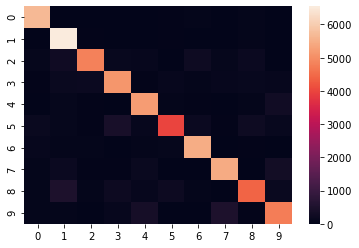

In [18]:
cf= sns.heatmap(confusion_matrix_df)
plt.show()

### One vs All testing part

In [19]:
data_raw_testX = mnist['testX']
N,p = data_raw_testX.shape
testX = pd.DataFrame(data_raw_testX)
testX_normalized = testX.astype(float)
testX_normalized = testX_normalized.apply(lambda x: x/255)
one_vector = np.ones(N)
testX_normalized[784]= one_vector
X_test= testX_normalized.copy()
X_test = X_test.to_numpy()
X_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [20]:
data_raw_testY = mnist['testY']
data_raw_testY = data_raw_testY.reshape((10000,1))
testY = pd.DataFrame(data_raw_testY)

In [21]:
Y_test_list = list()
G_test = list()
for i in range(0,9):
    y_test = testY[0].apply(lambda x: 1 if x == i else -1)
    y_test = testY.to_numpy()
    Y_test_list.append(y_test)
    weight_test = X_test@T[i]
    weight_test= weight_test.reshape((10000,1))
    G_test.append(weight_test)

y_pred_test = np.argmax(G_test,axis=0)
y_pred_data_test = pd.DataFrame(y_pred_test)
y_pred_data_test

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [22]:
testY

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [23]:
error_rate_test = testY.copy()
error_rate_test[1] = y_pred_data_test
error_rate_test.loc[error_rate_test[0] != error_rate_test[1], 'error'] = 1
error_total_test = error_rate_test['error'].sum()
error_total_test = error_total_test/len(error_rate_test)
error_total_test = error_total_test*100
error_total_test

21.02

In [24]:
confusion_matrix_test = np.zeros((10,10))
for i, rows in error_rate_test.iterrows():
    confusion_matrix_test[int(rows[0]),int(rows[1])]+=int(1)

confusion_matrix_df_test = pd.DataFrame(confusion_matrix_test, dtype=int)
confusion_matrix_df_test

,0,1,2,3,4,5,6,7,8,9
0,946,0,1,2,1,7,14,2,7,0
1,0,1107,2,2,3,1,5,1,14,0
2,19,56,815,26,16,0,43,21,36,0
3,5,20,27,878,6,17,9,25,23,0
4,0,26,6,2,913,8,10,4,13,0
5,24,16,4,69,23,673,25,18,40,0
6,18,9,9,0,23,18,874,0,7,0
7,5,42,18,7,27,0,1,926,2,0
8,14,49,11,30,27,42,15,20,766,0
9,29,34,13,66,427,38,6,346,50,0


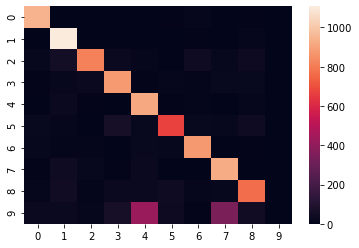

In [25]:
cf= sns.heatmap(confusion_matrix_df_test)
plt.show()

### One vs One classifier training part

In [26]:
X_train.shape

(60000, 785)

In [27]:
trainY

,0
0,5.0
1,0.0
2,4.0
3,1.0
4,9.0
...,...
59995,8.0
59996,3.0
59997,5.0
59998,6.0


In [28]:
trainX_normalized['label'] = trainY
trainX = trainX_normalized.copy()
trainX

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0


In [29]:
G = list()
Y_list = np.empty((10,10), dtype=object)
T = np.empty((10,10), dtype = object)

def Pinv(X_train):
    U,S,Vh = np.linalg.svd(X_train, full_matrices = False)
    m,p = U.shape
    r = np.linalg.matrix_rank(X_train)
    S_ = np.eye(p,p)
    for i in range(p):
        S_[i,i] = S[i]
    V = np.transpose(Vh)
    UH = np.transpose(U)
    S_inv = np.linalg.inv(S_)
    X_pinv = np.dot(np.dot(V,S_inv),UH)
    return X_pinv

for i in range(0,9):
    if i==0:
        for j in range(0,10):
            print((i,j))
            train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
            x_train = train_ovo.loc[:,0:784]
            m= len(x_train)
            x_train = x_train.to_numpy()
            X_pinv = Pinv(x_train)
            y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
            y = y_train.to_numpy()
            Y_list[i,j] = y
            theta = X_pinv@y
            T[i,j] = theta
 
    elif i==1:
        for j in range(2,10):
            print((i,j))
            train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
            x_train = train_ovo.loc[:,0:784]
            m= len(x_train)
            x_train = x_train.to_numpy()
            X_pinv = Pinv(x_train)
            y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
            y = y_train.to_numpy()
            Y_list[i,j] = y
            theta = X_pinv@y
            T[i,j] = theta

    
    elif i==2:
        for j in range(3,10):
            print((i,j))
            train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
            x_train = train_ovo.loc[:,0:784]
            m= len(x_train)
            x_train = x_train.to_numpy()
            X_pinv = Pinv(x_train)
            y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
            y = y_train.to_numpy()
            Y_list[i,j] = y
            theta = X_pinv@y
            T[i,j] = theta
    
    elif i==3:
        for j in range(4,10):
            print((i,j))
            train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
            x_train = train_ovo.loc[:,0:784]
            m= len(x_train)
            x_train = x_train.to_numpy()
            X_pinv = Pinv(x_train)
            y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
            y = y_train.to_numpy()
            Y_list[i,j] = y
            theta = X_pinv@y
            T[i,j] = theta
    
    elif i==4:
        for j in range(5,10):
            print((i,j))
            train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
            x_train = train_ovo.loc[:,0:784]
            m= len(x_train)
            x_train = x_train.to_numpy()
            X_pinv = Pinv(x_train)
            y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
            y = y_train.to_numpy()
            Y_list[i,j] = y
            theta = X_pinv@y
            T[i,j] = theta
    
    elif i==5:
        for j in range(6,10):
            print((i,j))
            train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
            x_train = train_ovo.loc[:,0:784]
            m= len(x_train)
            x_train = x_train.to_numpy()
            X_pinv = Pinv(x_train)
            y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
            y = y_train.to_numpy()
            Y_list[i,j] = y
            theta = X_pinv@y
            T[i,j] = theta

    
    elif i==6:
        for j in range(7,10):
            print((i,j))
            train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
            x_train = train_ovo.loc[:,0:784]
            m= len(x_train)
            x_train = x_train.to_numpy()
            X_pinv = Pinv(x_train)
            y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
            y = y_train.to_numpy()
            Y_list[i,j] = y
            theta = X_pinv@y
            T[i,j] = theta
    
    elif i==7:
        for j in range(8,10):
            print((i,j))
            train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
            x_train = train_ovo.loc[:,0:784]
            m= len(x_train)
            x_train = x_train.to_numpy()
            X_pinv = Pinv(x_train)
            y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
            y = y_train.to_numpy()
            Y_list[i,j] = y
            theta = X_pinv@y
            T[i,j] = theta
    
    elif i==8:
        j=9
        print((i,j))
        train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
        x_train = train_ovo.loc[:,0:784]
        m= len(x_train)
        x_train = x_train.to_numpy()
        X_pinv = Pinv(x_train)
        y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
        y = y_train.to_numpy()
        Y_list[i,j] = y
        theta = X_pinv@y
        T[i,j] = theta

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)


In [30]:
votes = np.zeros((60000,10))

for i in range(0,9):
    if i==0:
        for j in range(0,10):
            print((i,j))
            predict_votes = X_train@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
    if i==1:
        for j in range(2,10):
            print((i,j))
            predict_votes = X_train@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
    if i==2:
        for j in range(3,10):
            print((i,j))
            predict_votes = X_train@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
    if i==3:
        for j in range(4,10):
            print((i,j))
            predict_votes = X_train@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
    if i==4:
        for j in range(5,10):
            print((i,j))
            predict_votes = X_train@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
    if i==5:
        for j in range(6,10):
            print((i,j))
            predict_votes = X_train@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
    
    if i==6:
        for j in range(7,10):
            print((i,j))
            predict_votes = X_train@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
    
    if i==7:
        for j in range(8,10):
            print((i,j))
            predict_votes = X_train@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
        
    if i==8:
        for j in range(9,10):
            print((i,j))
            predict_votes = X_train@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
pred = np.argmax(votes, axis=1)
pred = pred.reshape((60000,1))
pred_dataset = pd.DataFrame(pred)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)


In [31]:
pred_dataset = pred_dataset.astype(float)

In [32]:
trainY

,0
0,5.0
1,0.0
2,4.0
3,1.0
4,9.0
...,...
59995,8.0
59996,3.0
59997,5.0
59998,6.0


In [33]:
pred_dataset

,0
0,5.0
1,0.0
2,4.0
3,1.0
4,9.0
...,...
59995,8.0
59996,3.0
59997,5.0
59998,6.0


In [34]:
error_dataset = trainY.copy()
error_dataset[1] = pred_dataset
error_dataset

,0,1
0,5.0,5.0
1,0.0,0.0
2,4.0,4.0
3,1.0,1.0
4,9.0,9.0
...,...,...
59995,8.0,8.0
59996,3.0,3.0
59997,5.0,5.0
59998,6.0,6.0


In [35]:
error_dataset.loc[error_dataset[0] != error_dataset[1], 'error'] = 1
error_dataset

,0,1,error
0,5.0,5.0,NaN
1,0.0,0.0,NaN
2,4.0,4.0,NaN
3,1.0,1.0,NaN
4,9.0,9.0,NaN
...,...,...,...
59995,8.0,8.0,NaN
59996,3.0,3.0,NaN
59997,5.0,5.0,NaN
59998,6.0,6.0,NaN


In [36]:
error_total = error_dataset['error'].sum()
error_total = error_total/len(error_dataset)
error_total*100

7.588333333333333

In [37]:
confusion_matrix = np.zeros((10,10))
for i, rows in error_dataset.iterrows():
    confusion_matrix[int(rows[0]),int(rows[1])]+=int(1)

confusion_matrix_df = pd.DataFrame(confusion_matrix, dtype=int)
confusion_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,5855,1,7,5,9,11,5,3,27,0
1,3,6620,32,23,5,14,2,10,24,9
2,540,61,5059,45,62,16,35,40,89,11
3,111,42,105,5523,8,141,18,51,91,41
4,37,21,15,2,5562,11,13,12,8,161
5,156,39,35,142,25,4878,84,7,42,13
6,161,14,35,4,32,83,5559,0,30,0
7,34,73,60,6,75,10,0,5832,5,170
8,82,189,45,115,41,147,35,16,5094,87
9,32,13,16,80,153,33,2,127,28,5465


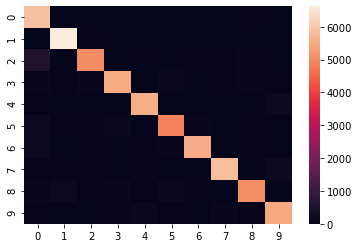

In [38]:
cf= sns.heatmap(confusion_matrix_df)
plt.show()

## One vs One classifier testing part

In [39]:
ata_raw_testX = mnist['testX']
N,p = data_raw_testX.shape
testX = pd.DataFrame(data_raw_testX)
testX_normalized = testX.astype(float)
testX_normalized = testX_normalized.apply(lambda x: x/255)
one_vector = np.ones(N)
testX_normalized[784]= one_vector
X_test= testX_normalized.copy()
X_test = X_test.to_numpy()
X_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [40]:
data_raw_testY = mnist['testY']
data_raw_testY = data_raw_testY.reshape((10000,1))
testY = pd.DataFrame(data_raw_testY)
testY

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [41]:
votes = np.zeros((10000,10))

for i in range(0,9):
    if i==0:
        for j in range(0,10):
            print((i,j))
            predict_votes = X_test@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
    if i==1:
        for j in range(2,10):
            print((i,j))
            predict_votes = X_test@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
    if i==2:
        for j in range(3,10):
            print((i,j))
            predict_votes = X_test@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
    if i==3:
        for j in range(4,10):
            print((i,j))
            predict_votes = X_test@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
    if i==4:
        for j in range(5,10):
            print((i,j))
            predict_votes = X_test@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
    if i==5:
        for j in range(6,10):
            print((i,j))
            predict_votes = X_test@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
    
    if i==6:
        for j in range(7,10):
            print((i,j))
            predict_votes = X_test@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
    
    if i==7:
        for j in range(8,10):
            print((i,j))
            predict_votes = X_test@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
        
    if i==8:
        for j in range(9,10):
            print((i,j))
            predict_votes = X_test@T[i,j]
            predict_votes = np.sign(predict_votes)
            for n in range(len(predict_votes)):
                if predict_votes[n] == 1:
                    votes[n,i] +=1
                elif predict_votes[n] == -1:
                    votes[n,j] +=1
pred = np.argmax(votes, axis=1)
pred = pred.reshape((10000,1))
pred_dataset = pd.DataFrame(pred)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)


In [42]:
pred_dataset

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [43]:
error_rate_test = testY.copy()
error_rate_test[1] = pred
error_rate_test.loc[error_rate_test[0] != error_rate_test[1], 'error'] = 1
error_total_test = error_rate_test['error'].sum()
error_total_test = error_total_test/len(error_rate_test)
error_total_test = error_total_test*100
error_total_test

8.469999999999999

In [44]:
confusion_matrix_test = np.zeros((10,10))
for i, rows in error_rate_test.iterrows():
    confusion_matrix_test[int(rows[0]),int(rows[1])]+=int(1)

confusion_matrix_df = pd.DataFrame(confusion_matrix_test, dtype=int)
confusion_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,970,0,1,1,0,3,3,2,0,0
1,0,1119,4,3,1,2,3,1,2,0
2,91,17,861,9,10,5,11,7,21,0
3,23,1,13,916,1,20,3,9,19,5
4,6,3,7,0,923,0,7,3,4,29
5,22,5,3,33,8,788,13,2,14,4
6,28,6,11,0,5,20,885,1,2,0
7,6,14,19,3,11,2,1,943,2,27
8,15,20,6,21,12,39,11,10,821,19
9,6,5,1,10,27,12,0,18,3,927


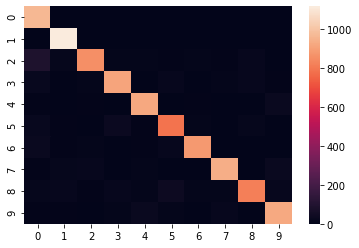

In [45]:
cf= sns.heatmap(confusion_matrix_df)
plt.show()

c) The digit '0' is easy to recognize such as the '1', '7', '9' or '3'. 
But digits '5','8', '6' and the '2' are must more harder. 
We can see that by looking our confusion matrix 

For both classification methods the error rate on the test dataset is much more important than the error rate on the train dataset. 

And to evalutae both classifier you can see that the OnevsAll classification is less efficient than the OnevsOne classifier. With the OnevsOne I got half errors than  with the OnevsAll

## Problem 3: Randomized Feature Based Least Square Classifiers

#### 1vsAll, training dataset

In [46]:
np.random.seed(101)
L = 1000
W = np.random.normal(0,1, size=[L,784])
b = np.random.normal(0,1, size=[L,1])
h = np.empty((60000,L))

In [47]:
W.shape

(1000, 784)

In [48]:
trainX = pd.DataFrame(data_raw_trainX)
trainX_normalized = trainX.astype(float)
trainX_normalized = trainX_normalized.apply(lambda x: x/255)
X_train = trainX_normalized.copy()
X_train = X_train.to_numpy()
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
for i in range(L):
    h[:,i] = (W[i]@np.transpose(X_train)+b[i])

In [50]:
one_vector = np.ones(60000)

In [51]:
h_dataset = pd.DataFrame(h)

In [52]:
h_dataset[1000] = one_vector

### g(x) = x

In [53]:
h_x0 = h_dataset.apply(lambda x: x)
h_x0 = h_x0.to_numpy()

In [54]:
def ova(X_train,trainY):
    G = list() 
    Y_list = list()
    T = list()

    U,S,Vh = np.linalg.svd(X_train, full_matrices = False)
    m,p = U.shape
    r = np.linalg.matrix_rank(X_train)
    S_ = np.eye(p,p)
    for i in range(p):
        S_[i,i] = S[i]
    V = np.transpose(Vh)
    UH = np.transpose(U)
    S_inv = np.linalg.inv(S_)

    for i in range(0,10):
        print(i)
        y_train = trainY[0].apply(lambda x: 1.0 if x == i else -1.0)
        y = y_train.to_numpy()
        Y_list.append(y)
        X_pinv = np.dot(np.dot(V,S_inv),UH)
        theta = X_pinv@y
        T.append(theta)
        weight = X_train@theta
        weight= weight.reshape((60000,1))
        #print(weight)
        G.append(weight)

    return G,T

def predict_ova(G):
    y_pred = np.argmax(G,axis=0)
    y_pred_data = pd.DataFrame(y_pred)
    return(y_pred_data)

In [55]:
trainY

,0
0,5.0
1,0.0
2,4.0
3,1.0
4,9.0
...,...
59995,8.0
59996,3.0
59997,5.0
59998,6.0


In [56]:
G,T = ova(h_x0,trainY)

0
1
2
3
4
5
6
7
8
9


In [57]:
pred = predict_ova(G)

In [58]:
pred

,0
0,3
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [59]:
error_rate_test = trainY.copy()
error_rate_test[1] = pred
error_rate_test.loc[error_rate_test[0] != error_rate_test[1], 'error'] = 1
error_total_test = error_rate_test['error'].sum()
error_total_test = error_total_test/len(error_rate_test)
error_total_test = error_total_test*100
error_total_test

15.446666666666667

### sigmoid function

In [60]:
def sigmoid(x):
    return(1/(1+np.exp(-x)))

In [61]:
h_x1 = h_dataset.apply(lambda x: sigmoid(x))
h_x1 = h_x1.to_numpy()

In [62]:
G2, T2= ova(h_x1,trainY)

0
1
2
3
4
5
6
7
8
9


In [63]:
pred2 = predict_ova(G2)

In [64]:
pred2

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [65]:
error_rate_test = trainY.copy()
error_rate_test[1] = pred2
error_rate_test.loc[error_rate_test[0] != error_rate_test[1], 'error'] = 1
error_total_test = error_rate_test['error'].sum()
error_total_test = error_total_test/len(error_rate_test)
error_total_test = error_total_test*100
error_total_test

6.715

### sinusoid

In [66]:
h_x2 = h_dataset.apply(lambda x: np.sin((x*np.pi)/180))
h_x2 = h_x2.to_numpy()

In [67]:
G3,T3= ova(h_x2,trainY)

0
1
2
3
4
5
6
7
8
9


In [68]:
pred3 = predict_ova(G3)

In [69]:
pred3

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [70]:
error_rate_test = trainY.copy()
error_rate_test[1] = pred3
error_rate_test.loc[error_rate_test[0] != error_rate_test[1], 'error'] = 1
error_total_test = error_rate_test['error'].sum()
error_total_test = error_total_test/len(error_rate_test)
error_total_test = error_total_test*100
error_total_test

8.046666666666667

### ReLU

In [71]:
h_x3 = h_dataset.apply(lambda x: np.maximum(x,0))
h_x3 = h_x3.to_numpy()

In [72]:
G4,T4 = ova(h_x3,trainY)

0
1
2
3
4
5
6
7
8
9


In [73]:
pred4= predict_ova(G4)

In [74]:
pred4

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [75]:
error_rate_test = trainY.copy()
error_rate_test[1] = pred4
error_rate_test.loc[error_rate_test[0] != error_rate_test[1], 'error'] = 1
error_total_test = error_rate_test['error'].sum()
error_total_test = error_total_test/len(error_rate_test)
error_total_test = error_total_test*100
error_total_test

5.4783333333333335

#### 1vsAll, testing dataset

In [76]:
def ova_test(X_test,testY,T):
    Y_test_list = list()
    G_test = list()
    for i in range(0,9):
        y_test = testY[0].apply(lambda x: 1 if x == i else -1)
        y_test = testY.to_numpy()
        T[i].shape
        Y_test_list.append(y_test)
        weight_test = X_test@T[i]
        weight_test= weight_test.reshape((10000,1))
        G_test.append(weight_test)

    y_pred_test = np.argmax(G_test,axis=0)
    y_pred_data_test = pd.DataFrame(y_pred_test)
    return y_pred_data_test

In [77]:
testX = pd.DataFrame(data_raw_testX)
testX_normalized = testX.astype(float)
testX_normalized = testX_normalized.apply(lambda x: x/255)
X_test = testX_normalized.to_numpy()
X_test.shape

(10000, 784)

In [78]:
np.random.seed(101)
L = 1000
W = np.random.normal(0,1, size=[L,784])
b = np.random.normal(0,1, size=[L,1])
h_test = np.empty((10000,L))
h_test.shape

(10000, 1000)

In [79]:
for i in range(L):
    h_test[:,i] = (W[i]@np.transpose(X_test)+b[i])

h_test.shape

(10000, 1000)

In [80]:
one_vector_test = np.ones(10000)

In [81]:
h_dataset_test = pd.DataFrame(h_test)
h_dataset_test[1000] = one_vector_test
h_dataset_test

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,6.502062,3.049392,-2.575544,-2.176008,4.662225,0.932975,2.952476,-15.081863,-3.067231,10.719392,...,-9.392355,-13.362301,7.145012,-2.917347,9.115006,-2.670411,-6.991444,0.866323,-2.421628,1.0
1,3.081222,-5.869005,1.628665,5.688541,-13.065739,-1.189414,1.795526,-11.759261,2.191109,3.475017,...,13.584947,-19.671588,10.469943,6.231307,4.316008,-1.927006,15.659520,-19.016488,-13.015168,1.0
2,9.704627,3.094674,7.645162,0.489869,1.991089,-11.585853,0.767627,5.554573,3.742430,13.308308,...,7.329674,-5.231382,0.325103,2.061749,4.169696,-6.153342,4.783440,0.426577,2.165013,1.0
3,-1.324877,-4.607037,13.650352,-3.317565,8.562239,-5.857685,15.318643,-5.306708,7.296750,6.315718,...,29.206706,-18.263995,-1.971396,-12.996995,10.497680,-9.398236,6.253439,0.536580,-9.620128,1.0
4,-0.873028,19.913351,17.573931,-12.746871,14.912205,8.932003,-10.105828,-15.945477,6.984077,7.628579,...,7.124311,-11.772637,-2.077792,-7.342244,2.607739,-13.559390,7.291944,0.535301,-2.885864,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11.903477,9.651238,11.200900,-4.903420,17.203392,-5.032003,2.035233,-22.860708,4.495534,4.186991,...,36.543377,-16.668448,2.783234,-0.599627,6.563645,-26.648122,11.793588,9.150765,-17.751048,1.0
9996,-4.352199,2.450971,22.192524,7.510576,1.889152,-8.428821,-6.069237,-5.601438,6.152110,21.846526,...,12.216458,-13.712723,4.813986,-8.263227,-0.111898,-2.075568,8.278424,9.883156,-13.129732,1.0
9997,14.180996,21.621021,13.979225,-2.581168,21.280022,-7.565156,13.597459,-12.704988,-0.518671,1.823745,...,7.997091,-11.958727,5.106562,0.601591,7.083018,-16.660133,-6.952538,3.607014,-3.906002,1.0
9998,0.553519,1.188671,-7.539688,0.432948,14.797541,-14.452348,21.358292,8.562208,10.580647,2.748143,...,0.193355,-11.155824,-0.810576,4.386208,4.560283,-1.491936,0.958644,6.087151,-10.822494,1.0


### g(x) = x

In [82]:
h_test_x0 = h_dataset_test.apply(lambda x: x)
h_test_x0 = h_test_x0.to_numpy()

In [83]:
testY

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [84]:
pred = ova_test(h_test_x0, testY, T)

In [85]:
pred

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [86]:
error_rate_test = testY.copy()
error_rate_test[1] = pred
error_rate_test.loc[error_rate_test[0] != error_rate_test[1], 'error'] = 1
error_total_test = error_rate_test['error'].sum()
error_total_test = error_total_test/len(error_rate_test)
error_total_test = error_total_test*100
error_total_test

21.98

### g(x) = sigmoid

In [87]:
h_test_x1 = h_dataset_test.apply(lambda x: sigmoid(x))
h_test_x1 = h_test_x1.to_numpy()

In [88]:
pred2 = ova_test(h_test_x1, testY, T2)

In [89]:
pred

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [90]:
error_rate_test = testY.copy()
error_rate_test[1] = pred2
error_rate_test.loc[error_rate_test[0] != error_rate_test[1], 'error'] = 1
error_total_test = error_rate_test['error'].sum()
error_total_test = error_total_test/len(error_rate_test)
error_total_test = error_total_test*100
error_total_test

15.47

### g(x) = sinusoid

In [91]:
h_test_x2 = h_dataset_test.apply(lambda x: np.sin((x*np.pi)/180))
h_test_x2 = h_test_x2.to_numpy()

In [92]:
pred3 = ova_test(h_test_x2, testY, T3)

In [93]:
pred3

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [94]:
error_rate_test = testY.copy()
error_rate_test[1] = pred3
error_rate_test.loc[error_rate_test[0] != error_rate_test[1], 'error'] = 1
error_total_test = error_rate_test['error'].sum()
error_total_test = error_total_test/len(error_rate_test)
error_total_test = error_total_test*100
error_total_test

16.74

### g(x) = ReLU

In [95]:
h_test_x3 = h_dataset_test.apply(lambda x: np.maximum(x,0))
h_test_x3 = h_test_x3.to_numpy()

In [96]:
pred4 = ova_test(h_test_x3, testY, T4)

In [97]:
pred4

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [98]:
error_rate_test = testY.copy()
error_rate_test[1] = pred4
error_rate_test.loc[error_rate_test[0] != error_rate_test[1], 'error'] = 1
error_total_test = error_rate_test['error'].sum()
error_total_test = error_total_test/len(error_rate_test)
error_total_test = error_total_test*100
error_total_test

14.46

## 1v1 classifier : training dataset

In [99]:
np.random.seed(101)
L = 1000
W = np.random.normal(0,1, size=[L,784])
b = np.random.normal(0,1, size=[L,1])
h = np.empty((60000,L))

In [100]:
trainX = pd.DataFrame(data_raw_trainX)
trainX_normalized = trainX.astype(float)
trainX_normalized = trainX_normalized.apply(lambda x: x/255)
X_train = trainX_normalized.copy()
X_train = X_train.to_numpy()
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
for i in range(L):
    h[:,i] = (W[i]@np.transpose(X_train)+b[i])

one_vector = np.ones(60000)
h_dataset = pd.DataFrame(h)
h_dataset[1000] = one_vector
h_dataset

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,-3.533022,-5.759104,6.841661,3.461725,6.053742,-3.762205,7.211507,-13.827741,7.062961,9.367931,...,35.476023,-16.776626,3.906541,-12.146448,10.931481,-7.629998,4.421322,17.203553,-5.523306,1.0
1,4.264149,5.100680,2.094284,-6.547422,1.130180,-7.172968,10.389413,-12.081849,7.036624,5.371360,...,18.818512,-11.753783,0.193845,-14.173596,10.514891,-10.277551,17.244257,2.079336,-4.746927,1.0
2,7.091812,-0.815126,4.693544,-9.559779,5.199163,0.390536,-0.347576,-4.410982,-0.484978,6.585312,...,11.033215,-12.762404,-4.063981,5.269717,-9.032879,-11.597630,0.761182,5.387914,0.082219,1.0
3,12.694210,13.818816,5.272721,-4.951413,11.361196,-11.350461,0.108764,-6.295180,11.454764,6.028947,...,7.395429,1.944752,11.808399,0.821866,1.236859,-7.923528,0.775291,4.811301,5.718935,1.0
4,12.830481,5.162975,7.969456,-2.820957,19.473926,-10.294001,10.178210,-16.707788,2.650674,-5.328716,...,7.168948,-5.551782,8.859183,1.394376,9.365361,-5.821830,-1.158716,-1.290554,1.623703,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-5.784655,12.592800,13.635632,-1.504748,19.900977,7.847488,2.528565,-5.768794,5.224300,0.854832,...,14.851545,-16.576966,7.854610,-3.026615,-8.500674,-18.425085,7.810077,12.237050,-12.341979,1.0
59996,-3.683191,10.129332,-0.631724,-1.393848,15.598364,-4.530312,2.072759,-12.938601,7.787338,8.094580,...,18.268797,-11.912344,2.370257,-2.336868,-9.564880,-16.071288,7.441267,15.524503,-17.726184,1.0
59997,-2.956929,-1.811482,7.133617,-0.694928,7.819694,1.886213,2.982467,-5.097222,4.492635,2.374073,...,18.461231,-4.419155,-1.958743,-4.106194,-5.417595,0.853721,-3.796428,8.528200,-4.748327,1.0
59998,7.681414,2.444520,1.087816,-5.617737,2.175053,-5.598402,14.003046,5.555772,-0.679560,-11.330110,...,4.200807,-13.368552,3.170093,-11.325211,8.443200,-0.329581,8.398380,-1.206088,-7.465990,1.0


In [102]:
trainY

,0
0,5.0
1,0.0
2,4.0
3,1.0
4,9.0
...,...
59995,8.0
59996,3.0
59997,5.0
59998,6.0


In [103]:
def ovo(trainX,l):
    G = list()
    Y_list = np.empty((10,10), dtype=object)
    T = np.empty((10,10), dtype = object)

    def Pinv(X_train):
        U,S,Vh = np.linalg.svd(X_train, full_matrices = False)
        m,p = U.shape
        r = np.linalg.matrix_rank(X_train)
        S_ = np.eye(p,p)
        for i in range(p):
            S_[i,i] = S[i]
        V = np.transpose(Vh)
        UH = np.transpose(U)
        S_inv = np.linalg.inv(S_)
        X_pinv = np.dot(np.dot(V,S_inv),UH)
        return X_pinv

    for i in range(0,9):
        if i==0:
            for j in range(0,10):
                print((i,j))
                train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
                x_train = train_ovo.loc[:,0:l]
                m= len(x_train)
                x_train = x_train.to_numpy()
                X_pinv = Pinv(x_train)
                y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
                y = y_train.to_numpy()
                Y_list[i,j] = y
                theta = X_pinv@y
                T[i,j] = theta

        elif i==1:
            for j in range(2,10):
                print((i,j))
                train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
                x_train = train_ovo.loc[:,0:l]
                m= len(x_train)
                x_train = x_train.to_numpy()
                X_pinv = Pinv(x_train)
                y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
                y = y_train.to_numpy()
                Y_list[i,j] = y
                theta = X_pinv@y
                T[i,j] = theta


        elif i==2:
            for j in range(3,10):
                print((i,j))
                train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
                x_train = train_ovo.loc[:,0:l]
                m= len(x_train)
                x_train = x_train.to_numpy()
                X_pinv = Pinv(x_train)
                y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
                y = y_train.to_numpy()
                Y_list[i,j] = y
                theta = X_pinv@y
                T[i,j] = theta

        elif i==3:
            for j in range(4,10):
                print((i,j))
                train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
                x_train = train_ovo.loc[:,0:l]
                m= len(x_train)
                x_train = x_train.to_numpy()
                X_pinv = Pinv(x_train)
                y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
                y = y_train.to_numpy()
                Y_list[i,j] = y
                theta = X_pinv@y
                T[i,j] = theta

        elif i==4:
            for j in range(5,10):
                print((i,j))
                train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
                x_train = train_ovo.loc[:,0:l]
                m= len(x_train)
                x_train = x_train.to_numpy()
                X_pinv = Pinv(x_train)
                y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
                y = y_train.to_numpy()
                Y_list[i,j] = y
                theta = X_pinv@y
                T[i,j] = theta

        elif i==5:
            for j in range(6,10):
                print((i,j))
                train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
                x_train = train_ovo.loc[:,0:l]
                m= len(x_train)
                x_train = x_train.to_numpy()
                X_pinv = Pinv(x_train)
                y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
                y = y_train.to_numpy()
                Y_list[i,j] = y
                theta = X_pinv@y
                T[i,j] = theta


        elif i==6:
            for j in range(7,10):
                print((i,j))
                train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
                x_train = train_ovo.loc[:,0:l]
                m= len(x_train)
                x_train = x_train.to_numpy()
                X_pinv = Pinv(x_train)
                y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
                y = y_train.to_numpy()
                Y_list[i,j] = y
                theta = X_pinv@y
                T[i,j] = theta

        elif i==7:
            for j in range(8,10):
                print((i,j))
                train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
                x_train = train_ovo.loc[:,0:l]
                m= len(x_train)
                x_train = x_train.to_numpy()
                X_pinv = Pinv(x_train)
                y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
                y = y_train.to_numpy()
                Y_list[i,j] = y
                theta = X_pinv@y
                T[i,j] = theta

        elif i==8:
            j=9
            print((i,j))
            train_ovo = trainX.loc[(trainX['label'] == i) | (trainX['label'] == j)]
            x_train = train_ovo.loc[:,0:l]
            m= len(x_train)
            x_train = x_train.to_numpy()
            X_pinv = Pinv(x_train)
            y_train = train_ovo['label'].apply(lambda x: 1.0 if x == i else -1.0)
            y = y_train.to_numpy()
            Y_list[i,j] = y
            theta = X_pinv@y
            T[i,j] = theta
        
    return T

In [104]:
def predict_ovo(X_test, T):
    votes = np.zeros((60000,10))

    for i in range(0,9):
        if i==0:
            for j in range(0,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1
        if i==1:
            for j in range(2,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1
        if i==2:
            for j in range(3,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1
        if i==3:
            for j in range(4,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1
        if i==4:
            for j in range(5,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1
        if i==5:
            for j in range(6,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1

        if i==6:
            for j in range(7,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1

        if i==7:
            for j in range(8,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1

        if i==8:
            for j in range(9,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1
    pred = np.argmax(votes, axis=1)
    pred = pred.reshape((60000,1))
    pred_dataset = pd.DataFrame(pred)
    return pred_dataset

### g(x) = x

In [105]:
h_x0 = h_dataset.apply(lambda x: x)
h_x0_training = h_x0.copy()
h_x0 = h_x0.to_numpy()
h_x0_training['label'] = trainY
h_x0_training

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,label
0,-3.533022,-5.759104,6.841661,3.461725,6.053742,-3.762205,7.211507,-13.827741,7.062961,9.367931,...,-16.776626,3.906541,-12.146448,10.931481,-7.629998,4.421322,17.203553,-5.523306,1.0,5.0
1,4.264149,5.100680,2.094284,-6.547422,1.130180,-7.172968,10.389413,-12.081849,7.036624,5.371360,...,-11.753783,0.193845,-14.173596,10.514891,-10.277551,17.244257,2.079336,-4.746927,1.0,0.0
2,7.091812,-0.815126,4.693544,-9.559779,5.199163,0.390536,-0.347576,-4.410982,-0.484978,6.585312,...,-12.762404,-4.063981,5.269717,-9.032879,-11.597630,0.761182,5.387914,0.082219,1.0,4.0
3,12.694210,13.818816,5.272721,-4.951413,11.361196,-11.350461,0.108764,-6.295180,11.454764,6.028947,...,1.944752,11.808399,0.821866,1.236859,-7.923528,0.775291,4.811301,5.718935,1.0,1.0
4,12.830481,5.162975,7.969456,-2.820957,19.473926,-10.294001,10.178210,-16.707788,2.650674,-5.328716,...,-5.551782,8.859183,1.394376,9.365361,-5.821830,-1.158716,-1.290554,1.623703,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-5.784655,12.592800,13.635632,-1.504748,19.900977,7.847488,2.528565,-5.768794,5.224300,0.854832,...,-16.576966,7.854610,-3.026615,-8.500674,-18.425085,7.810077,12.237050,-12.341979,1.0,8.0
59996,-3.683191,10.129332,-0.631724,-1.393848,15.598364,-4.530312,2.072759,-12.938601,7.787338,8.094580,...,-11.912344,2.370257,-2.336868,-9.564880,-16.071288,7.441267,15.524503,-17.726184,1.0,3.0
59997,-2.956929,-1.811482,7.133617,-0.694928,7.819694,1.886213,2.982467,-5.097222,4.492635,2.374073,...,-4.419155,-1.958743,-4.106194,-5.417595,0.853721,-3.796428,8.528200,-4.748327,1.0,5.0
59998,7.681414,2.444520,1.087816,-5.617737,2.175053,-5.598402,14.003046,5.555772,-0.679560,-11.330110,...,-13.368552,3.170093,-11.325211,8.443200,-0.329581,8.398380,-1.206088,-7.465990,1.0,6.0


In [106]:
T1 = ovo(h_x0_training,L)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)


In [107]:
pred1 = predict_ovo(h_x0,T1)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)


In [108]:
pred1

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [109]:
error_rate_test = trainY.copy()
error_rate_test[1] = pred1
error_rate_test.loc[error_rate_test[0] != error_rate_test[1], 'error'] = 1
error_total_test = error_rate_test['error'].sum()
error_total_test = error_total_test/len(error_rate_test)
error_total_test = error_total_test*100
error_total_test

8.138333333333334

### g(x)=sigmoid

In [110]:
h_x2 = h_dataset.apply(lambda x: sigmoid(x))
h_x2_training = h_x2.copy()
h_x2= h_x2.to_numpy()
h_x2_training['label'] = trainY

In [112]:
T3 = ovo(h_x2_training,L)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)


In [113]:
pred3 = predict_ovo(h_x2,T3)
pred3

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)


,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [114]:
error_rate_test = trainY.copy()
error_rate_test[1] = pred3
error_rate_test.loc[error_rate_test[0] != error_rate_test[1], 'error'] = 1
error_total_test = error_rate_test['error'].sum()
error_total_test = error_total_test/len(error_rate_test)
error_total_test = error_total_test*100
error_total_test

4.545

### g(x) = sin(x)

In [115]:
h_x1 = h_dataset.apply(lambda x: np.sin((x*np.pi)/180))
h_x1_training = h_x1.copy()
h_x1= h_x1.to_numpy()
h_x1_training['label'] = trainY


In [116]:
T2 = ovo(h_x1_training,L)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)


In [117]:
pred2 = predict_ovo(h_x1,T2)
pred2

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)


,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [118]:
error_rate_test = trainY.copy()
error_rate_test[1] = pred2
error_rate_test.loc[error_rate_test[0] != error_rate_test[1], 'error'] = 1
error_total_test = error_rate_test['error'].sum()
error_total_test = error_total_test/len(error_rate_test)
error_total_test = error_total_test*100
error_total_test

4.453333333333333

### g(x) = ReLU

In [119]:
h_x3 = h_dataset.apply(lambda x: np.maximum(x,0))
h_x3_training = h_x3.copy()
h_x3= h_x3.to_numpy()
h_x3_training['label'] = trainY

In [120]:
T4 = ovo(h_x3_training,L)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)


In [121]:
pred4 = predict_ovo(h_x3,T4)
pred4

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)


,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [122]:
error_rate_test = trainY.copy()
error_rate_test[1] = pred4
error_rate_test.loc[error_rate_test[0] != error_rate_test[1], 'error'] = 1
error_total_test = error_rate_test['error'].sum()
error_total_test = error_total_test/len(error_rate_test)
error_total_test = error_total_test*100
error_total_test

3.805

### 1v1 testing part

In [123]:
def predict_ovo_test(X_test,T):
    votes = np.zeros((10000,10))

    for i in range(0,9):
        if i==0:
            for j in range(0,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1
        if i==1:
            for j in range(2,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1
        if i==2:
            for j in range(3,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1
        if i==3:
            for j in range(4,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1
        if i==4:
            for j in range(5,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1
        if i==5:
            for j in range(6,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1

        if i==6:
            for j in range(7,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1

        if i==7:
            for j in range(8,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1

        if i==8:
            for j in range(9,10):
                print((i,j))
                predict_votes = X_test@T[i,j]
                predict_votes = np.sign(predict_votes)
                for n in range(len(predict_votes)):
                    if predict_votes[n] == 1:
                        votes[n,i] +=1
                    elif predict_votes[n] == -1:
                        votes[n,j] +=1
    pred = np.argmax(votes, axis=1)
    pred = pred.reshape((10000,1))
    pred_dataset = pd.DataFrame(pred)
    return pred_dataset

In [124]:
h_test = np.empty((10000,L))
testX = pd.DataFrame(data_raw_testX)
testX_normalized = testX.astype(float)
testX_normalized = testX_normalized.apply(lambda x: x/255)
X_test = testX_normalized.copy()
X_test = X_test.to_numpy()
X_test.shape
for i in range(L):
    h_test[:,i] = (W[i]@np.transpose(X_test)+b[i])

one_vector_test = np.ones(10000)
h_dataset_test = pd.DataFrame(h_test)
h_dataset_test[1000] = one_vector_test

### g(x) = x

In [125]:
htest0= h_dataset_test.apply(lambda x: x)
h_testing_0 = htest0.copy()
htest0 = htest0.to_numpy()
h_testing_0['label'] = trainY
h_testing_0

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,label
0,6.502062,3.049392,-2.575544,-2.176008,4.662225,0.932975,2.952476,-15.081863,-3.067231,10.719392,...,-13.362301,7.145012,-2.917347,9.115006,-2.670411,-6.991444,0.866323,-2.421628,1.0,5.0
1,3.081222,-5.869005,1.628665,5.688541,-13.065739,-1.189414,1.795526,-11.759261,2.191109,3.475017,...,-19.671588,10.469943,6.231307,4.316008,-1.927006,15.659520,-19.016488,-13.015168,1.0,0.0
2,9.704627,3.094674,7.645162,0.489869,1.991089,-11.585853,0.767627,5.554573,3.742430,13.308308,...,-5.231382,0.325103,2.061749,4.169696,-6.153342,4.783440,0.426577,2.165013,1.0,4.0
3,-1.324877,-4.607037,13.650352,-3.317565,8.562239,-5.857685,15.318643,-5.306708,7.296750,6.315718,...,-18.263995,-1.971396,-12.996995,10.497680,-9.398236,6.253439,0.536580,-9.620128,1.0,1.0
4,-0.873028,19.913351,17.573931,-12.746871,14.912205,8.932003,-10.105828,-15.945477,6.984077,7.628579,...,-11.772637,-2.077792,-7.342244,2.607739,-13.559390,7.291944,0.535301,-2.885864,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11.903477,9.651238,11.200900,-4.903420,17.203392,-5.032003,2.035233,-22.860708,4.495534,4.186991,...,-16.668448,2.783234,-0.599627,6.563645,-26.648122,11.793588,9.150765,-17.751048,1.0,5.0
9996,-4.352199,2.450971,22.192524,7.510576,1.889152,-8.428821,-6.069237,-5.601438,6.152110,21.846526,...,-13.712723,4.813986,-8.263227,-0.111898,-2.075568,8.278424,9.883156,-13.129732,1.0,8.0
9997,14.180996,21.621021,13.979225,-2.581168,21.280022,-7.565156,13.597459,-12.704988,-0.518671,1.823745,...,-11.958727,5.106562,0.601591,7.083018,-16.660133,-6.952538,3.607014,-3.906002,1.0,6.0
9998,0.553519,1.188671,-7.539688,0.432948,14.797541,-14.452348,21.358292,8.562208,10.580647,2.748143,...,-11.155824,-0.810576,4.386208,4.560283,-1.491936,0.958644,6.087151,-10.822494,1.0,9.0


In [126]:
pred1 = predict_ovo_test(htest0,T1)
pred1

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)


,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [127]:
def error_rate(trainY,pred):
    error_rate_test = trainY.copy()
    error_rate_test[1] = pred
    error_rate_test.loc[error_rate_test[0] != error_rate_test[1], 'error'] = 1
    error_total_test = error_rate_test['error'].sum()
    error_total_test = error_total_test/len(error_rate_test)
    error_total_test = error_total_test*100
    return error_total_test

In [128]:
error_rate0 = error_rate(testY,pred1)
error_rate0

9.27

### g(x) = sigmoid

In [129]:
htest1 = h_dataset_test.apply(lambda x: sigmoid(x))
h_testing_1 = htest1.copy()
htest1= htest1.to_numpy()
h_testing_1['label'] = trainY
h_testing_1

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,label
0,0.998502,0.954756,0.070729,0.101926,0.990643,7.176785e-01,0.950380,2.818577e-07,0.044479,0.999978,...,1.573351e-06,0.999212,5.130265e-02,0.999890,6.474208e-02,0.000919,7.039801e-01,8.153824e-02,0.731059,5.0
1,0.956111,0.002818,0.835987,0.996627,0.000002,2.333637e-01,0.857604,7.816536e-06,0.899448,0.969969,...,2.862449e-09,0.999972,9.980370e-01,0.986823,1.270823e-01,1.000000,5.511176e-09,2.226299e-06,0.731059,0.0
2,0.999939,0.956673,0.999522,0.620076,0.879858,9.296591e-06,0.683007,9.961452e-01,0.976852,0.999998,...,5.317703e-03,0.580567,8.871294e-01,0.984778,2.121852e-03,0.991702,6.050559e-01,8.970634e-01,0.731059,4.0
3,0.210008,0.009883,0.999999,0.034973,0.999809,2.849708e-03,1.000000,4.933758e-03,0.999323,0.998196,...,1.169628e-08,0.122239,2.267127e-06,0.999972,8.286323e-05,0.998080,6.310166e-01,6.637472e-05,0.731059,1.0
4,0.294625,1.000000,1.000000,0.000003,1.000000,9.998679e-01,0.000041,1.188413e-07,0.999074,0.999514,...,7.712680e-06,0.111274,6.471768e-04,0.931358,1.291907e-06,0.999319,6.307186e-01,5.285680e-02,0.731059,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.999993,0.999936,0.999986,0.007366,1.000000,6.483419e-03,0.884447,1.179562e-10,0.988964,0.985035,...,5.767466e-08,0.941763,3.544289e-01,0.998591,2.672191e-12,0.999992,9.998939e-01,1.953521e-08,0.731059,5.0
9996,0.012715,0.920632,1.000000,0.999453,0.868659,2.184311e-04,0.002308,3.678964e-03,0.997876,1.000000,...,1.108255e-06,0.991950,2.577591e-04,0.472055,1.114943e-01,0.999746,9.999490e-01,1.985313e-06,0.731059,8.0
9997,0.999999,1.000000,0.999999,0.070360,1.000000,5.179283e-04,0.999999,3.035936e-06,0.373163,0.861015,...,6.403065e-06,0.993980,6.460201e-01,0.999161,5.815620e-08,0.000955,9.735840e-01,1.972392e-02,0.731059,6.0
9998,0.634952,0.766503,0.000531,0.606577,1.000000,5.289624e-07,1.000000,9.998088e-01,0.999975,0.939808,...,1.429160e-05,0.307768,9.877052e-01,0.989649,1.836313e-01,0.722850,9.977333e-01,1.994536e-05,0.731059,9.0


In [130]:
pred3 = predict_ovo_test(htest1,T3)
pred3

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)


,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [131]:
error_rate1 = error_rate(testY,pred3)
error_rate1

5.89

### g(x) = sin(x)

In [132]:
htest2 = h_dataset_test.apply(lambda x: np.sin((x*np.pi)/180))
h_testing_2 = htest2.copy()
htest2= htest2.to_numpy()
h_testing_2['label'] = trainY
h_testing_2

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,label
0,0.113239,0.053197,-0.044937,-0.037969,0.081281,0.016283,0.051508,-0.260199,-0.053508,0.185999,...,-0.231108,0.124381,-0.050895,0.158417,-0.046591,-0.121721,0.015120,-0.042253,0.017452,5.0
1,0.053752,-0.102254,0.028422,0.099121,-0.226069,-0.020758,0.031333,-0.203800,0.038233,0.060613,...,-0.336628,0.181720,0.108543,0.075257,-0.033626,0.269920,-0.325840,-0.225209,0.017452,0.0
2,0.168569,0.053986,0.133038,0.008550,0.034744,-0.200836,0.013397,0.096794,0.065271,0.230191,...,-0.091178,0.005674,0.035977,0.072711,-0.107190,0.083390,0.007445,0.037778,0.017452,4.0
3,-0.023121,-0.080321,0.235996,-0.057870,0.148884,-0.102058,0.264187,-0.092487,0.127008,0.110007,...,-0.313396,-0.034401,-0.224900,0.182196,-0.163296,0.108927,0.009365,-0.167115,0.017452,1.0
4,-0.015237,0.340599,0.301936,-0.220644,0.257339,0.155262,-0.175467,-0.274722,0.121594,0.132751,...,-0.204029,-0.036256,-0.127796,0.045498,-0.234453,0.126925,0.009343,-0.050347,0.017452,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.206264,0.167650,0.194250,-0.085476,0.295765,-0.087712,0.035514,-0.388492,0.078381,0.073012,...,-0.286833,0.048558,-0.010465,0.114307,-0.448510,0.204387,0.159033,-0.304882,0.017452,5.0
9996,-0.075887,0.042764,0.377720,0.130709,0.032966,-0.146581,-0.105730,-0.097608,0.107168,0.372122,...,-0.237054,0.083921,-0.143721,-0.001953,-0.036218,0.143984,0.171639,-0.227157,0.017452,8.0
9997,0.244986,0.368466,0.241570,-0.045035,0.362926,-0.131654,0.235099,-0.219931,-0.009052,0.031825,...,-0.207207,0.089008,0.010500,0.123307,-0.286694,-0.121047,0.062913,-0.068120,0.017452,6.0
9998,0.009661,0.020745,-0.131213,0.007556,0.255404,-0.249575,0.364199,0.148883,0.183619,0.047946,...,-0.193478,-0.014147,0.076479,0.079508,-0.026036,0.016731,0.106041,-0.187767,0.017452,9.0


In [133]:
pred3 = predict_ovo_test(htest2,T2)
pred3

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)


,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [134]:
error_rate2 = error_rate(testY,pred3)
error_rate2

5.81

### g(x) = ReLU

In [135]:
htest3 = h_dataset_test.apply(lambda x: np.maximum(x,0))
h_testing_3 = htest3.copy()
htest3= htest3.to_numpy()
h_testing_3['label'] = trainY
h_testing_3

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,label
0,6.502062,3.049392,0.000000,0.000000,4.662225,0.932975,2.952476,0.000000,0.000000,10.719392,...,0.0,7.145012,0.000000,9.115006,0.0,0.000000,0.866323,0.000000,1.0,5.0
1,3.081222,0.000000,1.628665,5.688541,0.000000,0.000000,1.795526,0.000000,2.191109,3.475017,...,0.0,10.469943,6.231307,4.316008,0.0,15.659520,0.000000,0.000000,1.0,0.0
2,9.704627,3.094674,7.645162,0.489869,1.991089,0.000000,0.767627,5.554573,3.742430,13.308308,...,0.0,0.325103,2.061749,4.169696,0.0,4.783440,0.426577,2.165013,1.0,4.0
3,0.000000,0.000000,13.650352,0.000000,8.562239,0.000000,15.318643,0.000000,7.296750,6.315718,...,0.0,0.000000,0.000000,10.497680,0.0,6.253439,0.536580,0.000000,1.0,1.0
4,0.000000,19.913351,17.573931,0.000000,14.912205,8.932003,0.000000,0.000000,6.984077,7.628579,...,0.0,0.000000,0.000000,2.607739,0.0,7.291944,0.535301,0.000000,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11.903477,9.651238,11.200900,0.000000,17.203392,0.000000,2.035233,0.000000,4.495534,4.186991,...,0.0,2.783234,0.000000,6.563645,0.0,11.793588,9.150765,0.000000,1.0,5.0
9996,0.000000,2.450971,22.192524,7.510576,1.889152,0.000000,0.000000,0.000000,6.152110,21.846526,...,0.0,4.813986,0.000000,0.000000,0.0,8.278424,9.883156,0.000000,1.0,8.0
9997,14.180996,21.621021,13.979225,0.000000,21.280022,0.000000,13.597459,0.000000,0.000000,1.823745,...,0.0,5.106562,0.601591,7.083018,0.0,0.000000,3.607014,0.000000,1.0,6.0
9998,0.553519,1.188671,0.000000,0.432948,14.797541,0.000000,21.358292,8.562208,10.580647,2.748143,...,0.0,0.000000,4.386208,4.560283,0.0,0.958644,6.087151,0.000000,1.0,9.0


In [136]:
pred4 = predict_ovo_test(htest3,T4)
pred4

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)


,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [137]:
error_rate4 = error_rate(testY, pred4)
error_rate4

4.859999999999999

d) For each classifier and for each dataset, these features mappings perform better than the original classifier in problem 2. For instance for OnevsAll classifier in problem 2 we got 21.2% of error rate, it decreases to 14.4% with these new features. 
Same for the OnevsOne, we got 8% and it drop to 4.86% with these features. And we can see this improvement on both dataset. 
Plus as you can see, the better feature mapping is the ReLU, for both classification. It makes sense because in deep learning, ReLU is use in order to counter the vanishing descent gradient  phenomenom. (I already worked on descent gradient before)

## Variations of L

### 1vAll training part

In [159]:
L = np.arange(500,2500,500, dtype=int)

In [139]:
def error_rate(trainY,pred):
    error_rate_test = trainY.copy()
    error_rate_test[1] = pred
    error_rate_test.loc[error_rate_test[0] != error_rate_test[1], 'error'] = 1
    error_total_test = error_rate_test['error'].sum()
    error_total_test = error_total_test/len(error_rate_test)
    error_total_test = error_total_test*100
    return error_total_test

In [155]:
error_1 = list()
error_2 = list()
error_3 = list()
error_4 = list()
G_1 = list()
G_2 = list()
G_3 = list()
G_4 = list()
T_1 = list()
T_2 = list()
T_3 = list()
T_4 = list()
np.random.seed(101)
for l in L:
    print(f"------------------------- {l}---------------------")
    W = np.random.normal(0,1, size=[l,784])
    b = np.random.normal(0,1, size=[l,1])
    h = np.empty((60000,l))
    for i in range(l):
        h[:,i] = (W[i]@np.transpose(X_train)+b[i])
    one_vector = np.ones(60000)
    h_dataset = pd.DataFrame(h)
    h_dataset[l] = one_vector
    h_x0 = h_dataset.apply(lambda x: x)
    h_x0 = h_x0.to_numpy()
    h_x1 = h_dataset.apply(lambda x: (1/(1+np.exp(-x))))
    h_x1 = h_x1.to_numpy()
    h_x2 = h_dataset.apply(lambda x: np.sin((x*np.pi)/180))
    h_x2 = h_x2.to_numpy()
    h_x3 = h_dataset.apply(lambda x: np.maximum(x,0))
    h_x3 = h_x3.to_numpy()
    G,T = ova(h_x0,trainY)
    G2,T2 = ova(h_x1,trainY)
    G3,T3 = ova(h_x2,trainY)
    G4,T4 = ova(h_x3,trainY)
    G_1.append(G)
    G_2.append(G2)
    G_3.append(G3)
    G_4.append(G4)
    T_1.append(T)
    T_2.append(T2)
    T_3.append(T3)
    T_4.append(T4)
    pred = predict_ova(G)
    pred2 = predict_ova(G2)
    pred3 = predict_ova(G3)
    pred4= predict_ova(G4)
    error1 = error_rate(trainY,pred)
    error2 = error_rate(trainY,pred2)
    error3 = error_rate(trainY,pred3)
    error4 = error_rate(trainY,pred4)
    error_1.append(error1)
    error_2.append(error2)
    error_3.append(error3)
    error_4.append(error4)

------------------------- 500---------------------
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
------------------------- 1000---------------------
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
------------------------- 1500---------------------
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
------------------------- 2000---------------------
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


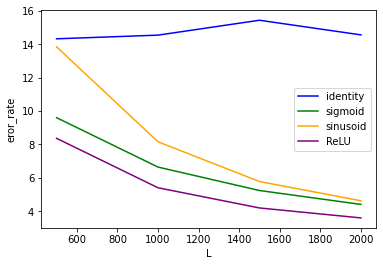

In [156]:
plt.figure("OnevsAll")
plt.plot(L, error_1, label="identity", color="blue")
plt.plot(L, error_2, label='sigmoid', color="green")
plt.plot(L, error_3, label='sinusoid', color='orange')
plt.plot(L,error_4, label='ReLU', color='purple')
plt.xlabel('L')
plt.ylabel("eror_rate")
plt.legend()
plt.show()

### 1vAll, testing part

In [161]:
L_ = L.tolist()
np.random.seed(101)
error_1_test = list()
error_2_test = list()
error_3_test = list()
error_4_test = list()
for l in L_:
    print(f"------------------------- {l}---------------------")
    W = np.random.normal(0,1, size=[l,784])
    b = np.random.normal(0,1, size=[l,1])
    h_test= np.empty((10000,l))
    for i in range(l):
        h_test[:,i] = (W[i]@np.transpose(X_test)+b[i])
    one_vector = np.ones(10000)
    h_dataset_test = pd.DataFrame(h_test)
    h_dataset_test[l] = one_vector
    h_x0 = h_dataset_test.apply(lambda x: x)
    h_x0 = h_x0.to_numpy()
    h_x1 = h_dataset_test.apply(lambda x: (1/(1+np.exp(-x))))
    h_x1 = h_x1.to_numpy()
    h_x2 = h_dataset_test.apply(lambda x: np.sin((x*np.pi)/180))
    h_x2 = h_x2.to_numpy()
    h_x3 = h_dataset_test.apply(lambda x: np.maximum(x,0))
    h_x3 = h_x3.to_numpy()
    j = L_.index(l)
    print(j)
    pred = ova_test(h_x0, testY, T_1[j])
    pred2 = ova_test(h_x1, testY, T_2[j])
    pred3 = ova_test(h_x2, testY, T_3[j])
    pred4= ova_test(h_x3, testY, T_4[j])
    error1 = error_rate(testY,pred)
    error2 = error_rate(testY,pred2)
    error3 = error_rate(testY,pred3)
    error4 = error_rate(testY,pred4)
    error_1_test.append(error1)
    error_2_test.append(error2)
    error_3_test.append(error3)
    error_4_test.append(error4)

------------------------- 500---------------------
0
------------------------- 1000---------------------
1
------------------------- 1500---------------------
2
------------------------- 2000---------------------
3


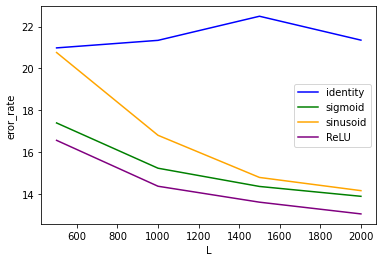

In [162]:
plt.figure("OnevsAll | testing dataset")
plt.plot(L, error_1_test, label="identity", color="blue")
plt.plot(L, error_2_test, label='sigmoid', color="green")
plt.plot(L, error_3_test, label='sinusoid', color='orange')
plt.plot(L,error_4_test, label='ReLU', color='purple')
plt.xlabel('L')
plt.ylabel("eror_rate")
plt.legend()
plt.show()

### 1v1 training part

In [163]:
error_1 = list()
error_2 = list()
error_3 = list()
error_4 = list()
G_1 = list()
G_2 = list()
G_3 = list()
G_4 = list()
T_1 = list()
T_2 = list()
T_3 = list()
T_4 = list()
np.random.seed(101)
for l in L:
    print(f"------------------------- {l}---------------------")
    W = np.random.normal(0,1, size=[l,784])
    b = np.random.normal(0,1, size=[l,1])
    h = np.empty((60000,l))
    for i in range(l):
        h[:,i] = (W[i]@np.transpose(X_train)+b[i])
    one_vector = np.ones(60000)
    h_dataset = pd.DataFrame(h)
    h_dataset[l] = one_vector
    h_x0 = h_dataset.apply(lambda x: x)
    h_x0_training = h_x0.copy()
    h_x0 = h_x0.to_numpy()
    h_x0_training['label'] = trainY
    h_x1 = h_dataset.apply(lambda x: (1/(1+np.exp(-x))))
    h_x1_training =h_x1.copy()
    h_x1 = h_x1.to_numpy()
    h_x1_training['label'] = trainY
    h_x2 = h_dataset.apply(lambda x: np.sin((x*np.pi)/180))
    h_x2_training =h_x2.copy()
    h_x2 = h_x2.to_numpy()
    h_x2_training['label'] = trainY
    h_x3 = h_dataset.apply(lambda x: np.maximum(x,0))
    h_x3_training =h_x3.copy()
    h_x3 = h_x3.to_numpy()
    h_x3_training['label'] = trainY
    T = ovo(h_x0_training,l)
    T2 = ovo(h_x1_training,l)
    T3 = ovo(h_x2_training,l)
    T4 = ovo(h_x3_training,l)
    T_1.append(T)
    T_2.append(T2)
    T_3.append(T3)
    T_4.append(T4)
    pred = predict_ovo(h_x0,T)
    pred2 = predict_ovo(h_x1,T2)
    pred3 = predict_ovo(h_x2,T3)
    pred4= predict_ovo(h_x3,T4)
    error1 = error_rate(trainY,pred)
    error2 = error_rate(trainY,pred2)
    error3 = error_rate(trainY,pred3)
    error4 = error_rate(trainY,pred4)
    error_1.append(error1)
    error_2.append(error2)
    error_3.append(error3)
    error_4.append(error4)

------------------------- 500---------------------
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 

(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)

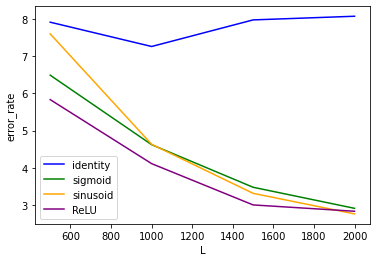

In [164]:
plt.figure("OnevsOne | training dataset")
plt.plot(L, error_1, label="identity", color="blue")
plt.plot(L, error_2, label='sigmoid', color="green")
plt.plot(L, error_3, label='sinusoid', color='orange')
plt.plot(L,error_4, label='ReLU', color='purple')
plt.xlabel('L')
plt.ylabel("error_rate")
plt.legend()
plt.show()

In [165]:
L_ = L.tolist()
np.random.seed(101)
error_1_test = list()
error_2_test = list()
error_3_test = list()
error_4_test = list()
for l in L_:
    print(f"------------------------- {l}---------------------")
    W = np.random.normal(0,1, size=[l,784])
    b = np.random.normal(0,1, size=[l,1])
    h_test= np.empty((10000,l))
    for i in range(l):
        h_test[:,i] = (W[i]@np.transpose(X_test)+b[i])
    one_vector = np.ones(10000)
    h_dataset_test = pd.DataFrame(h_test)
    h_dataset_test[l] = one_vector
    h_x0 = h_dataset_test.apply(lambda x: x)
    h_x0_testing = h_x0.copy()
    h_x0 = h_x0.to_numpy()
    h_x0_testing['label'] = trainY
    h_x1 = h_dataset_test.apply(lambda x: (1/(1+np.exp(-x))))
    h_x1_testing =h_x1.copy()
    h_x1 = h_x1.to_numpy()
    h_x1_testing['label'] = trainY
    h_x2 = h_dataset_test.apply(lambda x: np.sin((x*np.pi)/180))
    h_x2_testing =h_x2.copy()
    h_x2 = h_x2.to_numpy()
    h_x2_testing['label'] = trainY
    h_x3 = h_dataset_test.apply(lambda x: np.maximum(x,0))
    h_x3_testing =h_x3.copy()
    h_x3 = h_x3.to_numpy()
    h_x3_testing['label'] = trainY
    j = L_.index(l)
    pred = predict_ovo_test(h_x0, T_1[j])
    pred2 = predict_ovo_test(h_x1, T_2[j])
    pred3 = predict_ovo_test(h_x2, T_3[j])
    pred4= predict_ovo_test(h_x3, T_4[j])
    error1 = error_rate(testY,pred)
    error2 = error_rate(testY,pred2)
    error3 = error_rate(testY,pred3)
    error4 = error_rate(testY,pred4)
    error_1_test.append(error1)
    error_2_test.append(error2)
    error_3_test.append(error3)
    error_4_test.append(error4)

------------------------- 500---------------------
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 8)
(7, 9)
(8, 9)
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 7)
(6, 8)
(6, 9)
(7, 

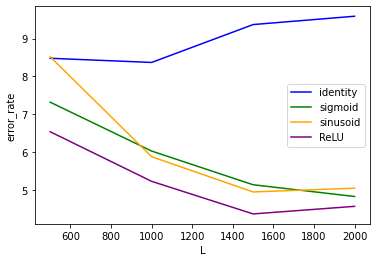

In [166]:
plt.figure("OnevsOne | testing dataset")
plt.plot(L, error_1_test, label="identity", color="blue")
plt.plot(L, error_2_test, label='sigmoid', color="green")
plt.plot(L, error_3_test, label='sinusoid', color='orange')
plt.plot(L,error_4_test, label='ReLU', color='purple')
plt.xlabel('L')
plt.ylabel("error_rate")
plt.legend()
plt.show()

e) Addings more features improve a lot the classifiers. As you can see biggest is the matrix X_train, better will be the prediction. It makes sense because the classification needs to get a lot of points to get a powerful training. Addings these new features allow to get a lot of new points and get a better accuracy.